Code: Use Pandas to read the CSV file and store them in a DataFrame object named badminton2.
Next, it will display the data frame.

In [1]:
import pandas as pd
badminton2 = pd.read_csv('badmintondata2.csv', header='infer')

badminton2

,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres
0,4,1,10,40,-50,4.076522,0.908805,2.662589
1,4,1,10,40,-50,4.151082,0.819947,2.725236
2,4,1,10,40,-50,4.227713,0.728623,2.786250
3,4,1,10,40,-50,4.303163,0.638705,2.845674
4,4,1,10,40,-50,4.376557,0.551237,2.904019
...,...,...,...,...,...,...,...,...
242395,0,0,0,0,0,0.000000,0.000000,0.000000
242396,0,0,0,0,0,0.000000,0.000000,0.000000
242397,0,0,0,0,0,0.000000,0.000000,0.000000
242398,0,0,0,0,0,0.000000,0.000000,0.000000


Check Data Types

In [2]:
badminton2.dtypes

HUMAN PLAYER POSITION (X) metres                 int64
HUMAN PLAYER POSITION (Y) metres                 int64
INITITAL VELOCITY OF SHUTTELCOCK(m/s)            int64
INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)        int64
SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)      int64
SHUTTLECOCK POSITIION IN AIR(X ) metres        float64
SHUTTLECOCK POSITIION IN AIR(Y) metres         float64
SHUTTLECOCK POSITIION IN AIR(Z) metres         float64
dtype: object

Identify if there is any Missing Data in the attributes

In [3]:
print(badminton2.isnull().sum())

HUMAN PLAYER POSITION (X) metres               0
HUMAN PLAYER POSITION (Y) metres               0
INITITAL VELOCITY OF SHUTTELCOCK(m/s)          0
INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)      0
SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)    0
SHUTTLECOCK POSITIION IN AIR(X ) metres        0
SHUTTLECOCK POSITIION IN AIR(Y) metres         0
SHUTTLECOCK POSITIION IN AIR(Z) metres         0
dtype: int64


Identidy if there is any Outlier Data in the attributes

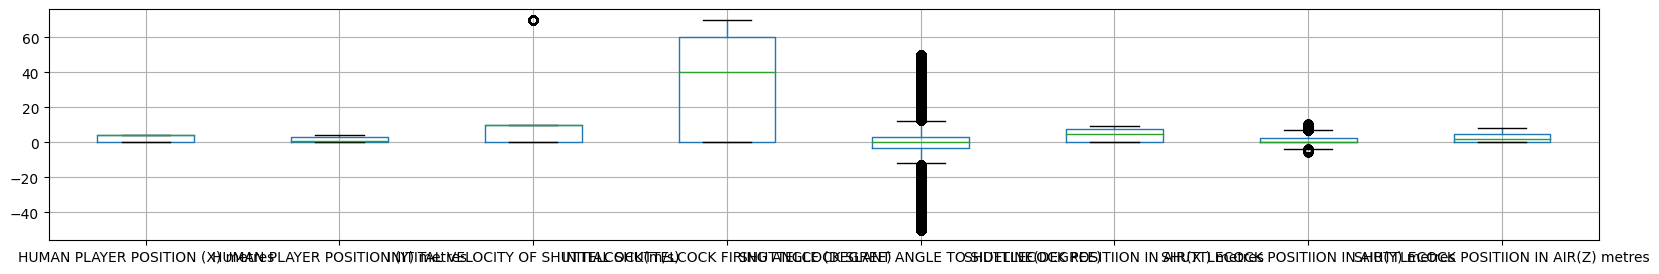

In [4]:
# Data Visualization

_ = badminton2.boxplot(figsize=(20, 3))

The boxplots suggest that only 3 of the columns (INITITAL VELOCITY OF SHUTTELCOCK(m/s), SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE), SHUTTLECOCK POSITIION IN AIR(Y) metres) contain abnormally values.

In [5]:
# Use Z score methodology for each attribute to remove such outlier

# Z score
Z = (badminton2 - badminton2.mean()) / badminton2.std()
Z[20:25]

,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres
20,0.932285,-0.226332,0.03843,0.413425,-2.344676,0.428723,-0.964255,0.498222
21,0.932285,-0.226332,0.03843,0.413425,-2.344676,0.446121,-1.000000,0.514025
22,0.932285,-0.226332,0.03843,0.413425,-2.344676,0.463292,-1.035279,0.529778
23,0.932285,-0.226332,0.03843,0.413425,-2.344676,0.480123,-1.069860,0.545706
24,0.932285,-0.226332,0.03843,0.413425,-2.344676,0.496570,-1.103651,0.560362


In [6]:
# Discard Z > 3 and Z < -3

print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1) == 8) & ((Z <= 3).sum(axis=1) == 8), :]
print('Number of rows after discarding outliers = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 242400
Number of rows after discarding outliers = 224352


In [7]:
without_outliers_data = badminton2.loc[Z2.index, :]
without_outliers_data

,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres
0,4,1,10,40,-50,4.076522,0.908805,2.662589
1,4,1,10,40,-50,4.151082,0.819947,2.725236
2,4,1,10,40,-50,4.227713,0.728623,2.786250
3,4,1,10,40,-50,4.303163,0.638705,2.845674
4,4,1,10,40,-50,4.376557,0.551237,2.904019
...,...,...,...,...,...,...,...,...
242395,0,0,0,0,0,0.000000,0.000000,0.000000
242396,0,0,0,0,0,0.000000,0.000000,0.000000
242397,0,0,0,0,0,0.000000,0.000000,0.000000
242398,0,0,0,0,0,0.000000,0.000000,0.000000


Identify Duplicate Data

In [8]:
# Check whether each row is a duplicate of a previous row in the table
dups = without_outliers_data.duplicated()
dups

0         False
1         False
2         False
3         False
4         False
          ...  
242395     True
242396     True
242397     True
242398     True
242399     True
Length: 224352, dtype: bool

In [9]:
duplicate = without_outliers_data[without_outliers_data.duplicated()]
duplicate

,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres
129,0,0,0,0,0,0.0,0.0,0.0
130,0,0,0,0,0,0.0,0.0,0.0
131,0,0,0,0,0,0.0,0.0,0.0
132,0,0,0,0,0,0.0,0.0,0.0
133,0,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
242395,0,0,0,0,0,0.0,0.0,0.0
242396,0,0,0,0,0,0.0,0.0,0.0
242397,0,0,0,0,0,0.0,0.0,0.0
242398,0,0,0,0,0,0.0,0.0,0.0


The results suggest there are 112715 duplicate rows in the dataset.

In [10]:
# Drop duplicate data
print('Number of rows before discarding duplicates = %d' % (without_outliers_data.shape[0]))
data2 = without_outliers_data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 224352
Number of rows after discarding duplicates = 111637


Remove data values that is <= 0

In [11]:
data2 = data2[(data2[data2.columns] > 0).all(axis=1)]

data2

,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres
10200,4,1,10,40,1,4.076937,1.001343,2.662080
10201,4,1,10,40,1,4.150607,1.002629,2.725872
10202,4,1,10,40,1,4.227416,1.003970,2.787845
10203,4,1,10,40,1,4.300908,1.005252,2.846121
10204,4,1,10,40,1,4.376173,1.006566,2.905997
...,...,...,...,...,...,...,...,...
161475,4,4,10,60,50,7.153229,7.757872,6.312965
161476,4,4,10,60,50,7.182794,7.793107,6.328785
161477,4,4,10,60,50,7.213350,7.829521,6.345685
161478,4,4,10,60,50,7.248687,7.871634,6.358913


In [12]:
data2.to_csv("cleaned_data.csv", index=False)